<a href="https://colab.research.google.com/github/SURENDRAN-17/technology-dissertation-/blob/main/dissertation_1ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =========================
# STEP 1: Import Libraries
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# =========================
# STEP 2: Load and Preprocess Data
# =========================
# Load your dataset (update the path if needed)
import pandas as pd
file_path = '/content/drive/My Drive/dissertation/merged_output.csv'
df = pd.read_csv(file_path)
df.head()



,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1980-01-01 00:00:00,-0.7,-3.0,2.0,NaN,NaN,44.0,6.2,NaN,1015.0,NaN
1,1980-01-02 00:00:00,-1.3,-4.0,4.0,NaN,NaN,NaN,3.5,NaN,1026.0,NaN
2,1980-01-03 00:00:00,6.3,1.0,10.0,NaN,NaN,171.0,19.1,NaN,1014.5,NaN
3,1980-01-04 00:00:00,7.5,5.0,11.0,NaN,NaN,250.0,23.6,NaN,1004.2,NaN
4,1980-01-05 00:00:00,6.8,5.0,8.0,NaN,NaN,274.0,28.2,NaN,1007.9,NaN


In [4]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Use only 'tavg' (average temperature), and drop NaNs
df_temperature = df[['tavg']].dropna()

# Normalize the data
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(df_temperature)


In [5]:
# =========================
# STEP 3: Create Sequences
# =========================
def create_sequences(data, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

SEQ_LEN = 30
X, y = create_sequences(temperature_scaled, sequence_length=SEQ_LEN)

In [6]:
# =========================
# STEP 4: Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [7]:
# =========================
# STEP 5: Build LSTM Model
# =========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# =========================
# STEP 6: Train the Model
# =========================
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0279 - val_loss: 0.0044
Epoch 2/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0082 - val_loss: 0.0040
Epoch 3/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0070 - val_loss: 0.0036
Epoch 4/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0066 - val_loss: 0.0034
Epoch 5/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0053 - val_loss: 0.0029
Epoch 6/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0050 - val_loss: 0.0027
Epoch 7/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 8/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 9/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 10/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 11/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 12/50
328/328 ━━━━━━━━━━━━━━━━━━━━

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
MAE: 1.28, RMSE: 1.65


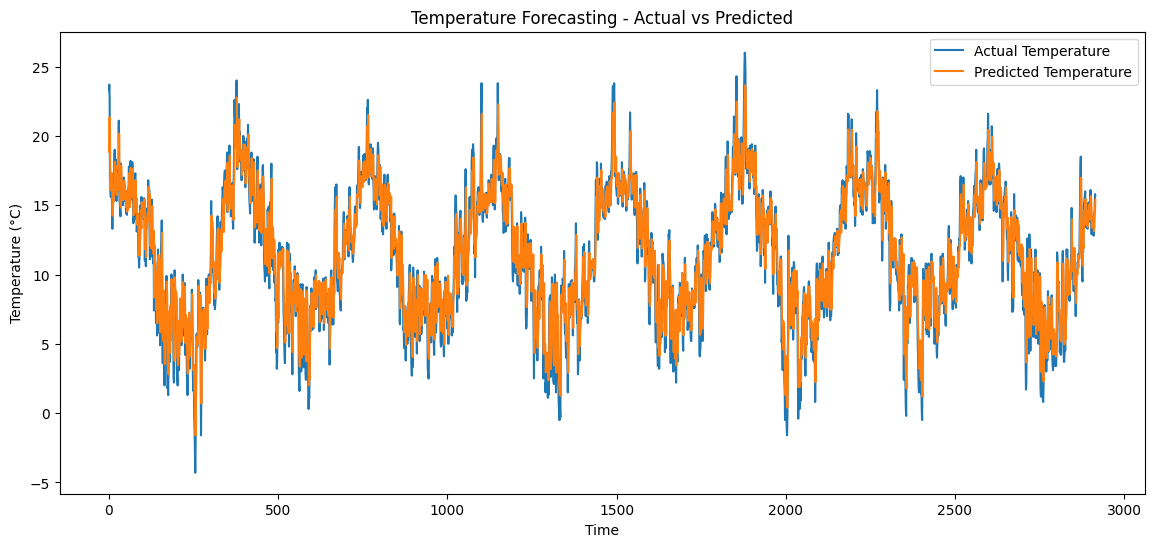

In [9]:
# STEP 7: Evaluate Model
# =========================
# Predict on test set
y_pred = model.predict(X_test)

# Rescale predictions back to real temperature values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(14,6))
plt.plot(y_test_rescaled, label='Actual Temperature')
plt.plot(y_pred_rescaled, label='Predicted Temperature')
plt.title("Temperature Forecasting - Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

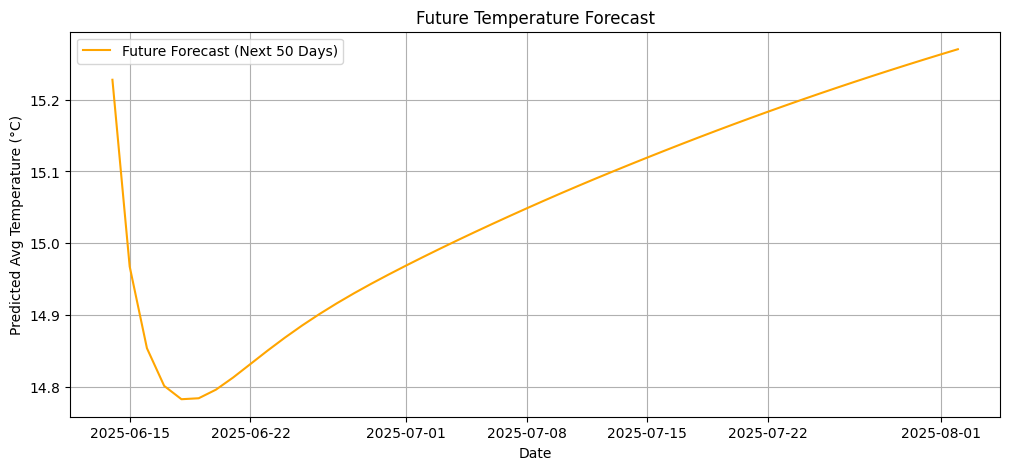

In [10]:
# STEP 8: Forecast Future Dates
# =========================
# Use last 30 days to predict next N days
N_DAYS = 50
last_seq = temperature_scaled[-SEQ_LEN:]
future_preds = []

for _ in range(N_DAYS):
    input_seq = last_seq.reshape(1, SEQ_LEN, 1)
    pred = model.predict(input_seq)[0]
    future_preds.append(pred)
    last_seq = np.append(last_seq[1:], pred)  # slide window

# Inverse scale predictions
future_preds_real = scaler.inverse_transform(future_preds)

# Create future date range
last_date = df_temperature.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=N_DAYS)

# Create dataframe
forecast_df = pd.DataFrame({
    'date': future_dates,
    'predicted_tavg': future_preds_real.flatten()
})
forecast_df.set_index('date', inplace=True)
print(forecast_df)

# Plot future forecast
plt.figure(figsize=(12,5))
plt.plot(forecast_df, label='Future Forecast (Next 50 Days)', color='orange')
plt.title("Future Temperature Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Avg Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


STEP 9: Improved Training Code with Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.h5', save_best_only=True, monitor='val_loss')

# Rebuild improved model with more LSTM layers
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQ_LEN, 1)),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop, model_checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,417 (501.63 KB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0269

328/328 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - loss: 0.0268 - val_loss: 0.0046
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 0.0102 - val_loss: 0.0048
Epoch 3/100
170/328 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0089

 STEP 10: Evaluate and Tune Further for Accuracy

In [ ]:
# Load the best saved model if needed
from tensorflow.keras.models import load_model
model = load_model('best_lstm_model.h5')

# Predict again on test set
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Metrics
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"Improved MAE: {mae:.2f}, Improved RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(14,6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title("Improved LSTM Model - Actual vs Predicted")
plt.legend()
plt.show()


 consider: step 10 better accuracy

Use Bidirectional LSTM:

In [ ]:
from tensorflow.keras.layers import Bidirectional
...
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(SEQ_LEN, 1)),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])


STEP 11: Multivariate LSTM (Multiple Weather Inputs)

In [ ]:
# Use multiple weather features
features = ['tavg', 'tmin', 'tmax', 'wspd', 'pres']
df_multivariate = df[features].dropna()

# Scale all features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_multivariate)

# Create multivariate sequences
def create_multivariate_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])  # Predict only 'tavg'
    return np.array(X), np.array(y)

X, y = create_multivariate_sequences(data_scaled, seq_length=30)


STEP 12: Sequence-to-Sequence Forecast (Multi-step Ahead)

In [ ]:
# Create sequences for multi-step prediction
def create_multistep_sequences(data, seq_length=30, forecast_horizon=7):
    X, y = [], []
    for i in range(len(data) - seq_length - forecast_horizon):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+forecast_horizon, 0])  # only tavg
    return np.array(X), np.array(y)

X, y = create_multistep_sequences(data_scaled, seq_length=30, forecast_horizon=7)

# y shape = (samples, 7)


Model Output Change

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(30, X.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dense(7)  # Predict 7 days
])


Facebook Prophet (easier):  STEP 13: Compare with Other Models (Transformer or Prophet)

In [ ]:
from prophet import Prophet
df_prophet = df_temperature.reset_index()
df_prophet.columns = ['ds', 'y']

model = Prophet()
model.fit(df_prophet)

# Forecast next 365 days
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

model.plot(forecast)


In [ ]:
!pip install keras-tuner --upgrade


 STEP 14: Hyperparameter Tuning (Grid Search with Keras Tuner)

In [ ]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Example: Confirm shape
print("X_train shape:", X_train.shape)  # should be (samples, 30, num_features)
print("y_train shape:", y_train.shape)

# -----------------------------------------
# STEP 1: Define model builder for Keras Tuner
# -----------------------------------------
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(
        units=hp.Int('units_1', min_value=32, max_value=256, step=32),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    model.add(tf.keras.layers.LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32)
    ))
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

    model.add(tf.keras.layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')
        ),
        loss='mse'
    )
    return model

# -----------------------------------------
# STEP 2: Set up the tuner
# -----------------------------------------
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='lstm_weather_forecast'
)

# -----------------------------------------
# STEP 3: Run the tuner search
# -----------------------------------------
tuner.search(X_train, y_train,
             epochs=30,
             batch_size=32,
             validation_split=0.1,
             verbose=1)

# -----------------------------------------
# STEP 4: Get the best model
# -----------------------------------------
best_model = tuner.get_best_models(num_models=1)[0]

# -----------------------------------------
# STEP 5: Evaluate and predict
# -----------------------------------------
y_pred = best_model.predict(X_test)

# Rescale if needed
try:
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test)
except:
    y_pred_rescaled = y_pred
    y_test_rescaled = y_test

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

print(f"\n✅ Tuned Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# -----------------------------------------
# STEP 6: Plot predictions
# -----------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.title("Best LSTM Model - Temperature Forecast")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()


Step 15: Save and Load the Best Model


In [ ]:
best_model.save("best_lstm_model.h5")
print("✅ Model saved successfully.")


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("best_lstm_model.h5")
y_loaded_pred = loaded_model.predict(X_test)

# Optional: Rescale
try:
    y_loaded_pred_rescaled = scaler.inverse_transform(y_loaded_pred)
except:
    y_loaded_pred_rescaled = y_loaded_pred
